Analytic solutions to single-layer compressible vortical flow pressure/density tendency in polar coords with radial flow proportional to radial pressure gradient: 

<font size="4">
$P =  P_{e} - P_\Delta$

$P_\Delta =P_{\Delta0}e^{\frac{-r^2}{2r_{m}^2}}$ 

$V_r = -a \frac{dP}{dr}$

$\frac{dP}{dt} = -V_r \frac{dP}{dr} - P \frac{dV_r}{dr} - \frac{PV_r}{r} =$ adv + div + geo

$\frac{dP_\Delta}{dt}  = \frac{-a}{r_m^2} \left[\frac{r^2}{r_m^2}P_\Delta^2 + (1-\frac{r^2}{r_m^2}) (P_e - P_\Delta)P_\Delta + (P_e - P_\Delta)P_\Delta\right]$

$ \left.\frac{dP_\Delta}{dt}\right|_{r=0} = \frac{-2aP_\Delta}{r_m^2}(P_e-P_\Delta)$

$P_\Delta(t)=P_e\left[1+\left(\frac{P_e}{P_0}-1\right)e^{kt}\right]^{-1} ,  k=\frac{2aP_e}{r_m^2}$

$t_{1/2}=\frac{r_m^2}{2aP_e}\ln{\left(1+\frac{P_e}{P_e-P_0}\right)}$
</font>

In [2]:
import numpy as np
from scipy.special import lambertw
from matplotlib import pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/home/nsparks/anaconda3/envs/itc/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(30000.0, 50000.0)

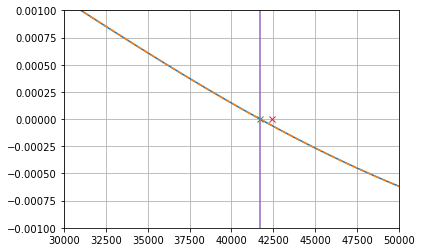

In [3]:
a=0.1
r0=30000
r=np.arange(100,250000,50)
rkm=r/1000
dr=r[1]-r[0]

Pe=101600
Pdmax=9000

Pd=Pdmax*np.exp(-r**2/(2*r0**2))
P=Pe-Pd
# rho=P/(287*300)
R=287
T=300
dPdr=np.gradient(P,r)
d2Pdr2=np.gradient(dPdr,r)

Vt=np.sqrt(R*T*(r*dPdr)/P)
VtGauss=np.sqrt(R*T)*(r/r0)*(Pe/P-1)**0.5

dVtdr=np.gradient(Vt,r)

Vr=-a*dPdr
dVrdr=np.gradient(Vr,r)
# 
# plt.plot(r,Vt)
# plt.plot(r,VtGauss,'--')
plt.plot(r,dVtdr)
plt.plot(r,np.sqrt(R*T/r0**2*(Pe/P-1))*(1-r**2*Pe/(2*r0**2*P)),'--')
plt.grid(True)

# a=np.sqrt(2*r0**2)
# b=Pdmax/Pe
# rmax=a*(1-lambertw(b*np.exp(1)/a))

rmax=(2*r0**2*(lambertw(-np.exp(-1)*Pdmax/Pe)+1))**0.5
rmax2=(2*r0**2*(0+1))**0.5

plt.plot(rmax,0,'x')
plt.plot(rmax2,0,'x')
plt.plot(r,2*r0**2*(Pe-Pdmax*np.exp(-r**2/(2*r0**2)))-r**2*Pe)
plt.ylim((-.001,.001))
plt.xlim((30000,50000))
# dPm1dr=np.gradient(1/P,r)
# plt.plot(r,dPm1dr)
# plt.plot(r,-1/P**2*r/r0**2*(Pe-P),'--')

# plt.plot(r,dPdr)
# plt.plot(r,(r/r0**2)*(Pe-P),'--')
# plt.grid(True)

# plt.plot(r,d2Pdr2)
# plt.plot(r,((Pe-P)/r0**2)*(1-(r**2)/(r0**2)),'--')
# plt.grid(True)



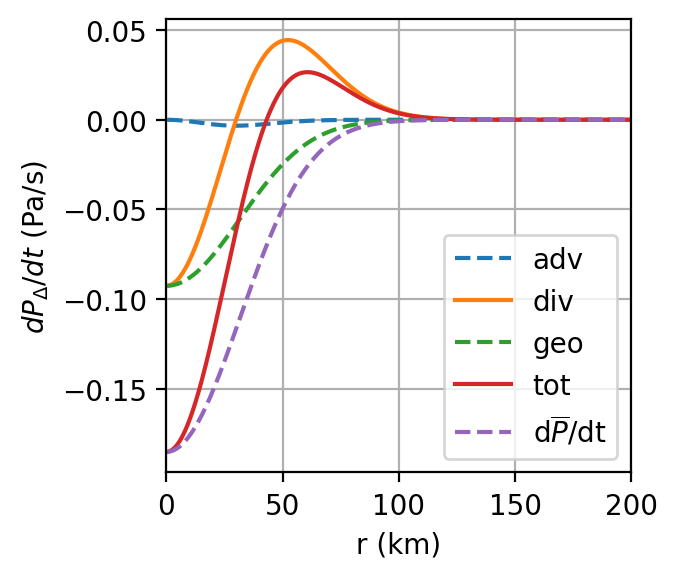

In [42]:
# adv=-a*r**2/rmax**4*Pd**2
# div=-a/rmax**2*(1-r**2/rmax**2)*(Pe-Pd)*Pd
# geo=-a/rmax**2*(Pe-Pd)*Pd
# tot=adv+div+geo
a=0.1
r0=30000
r=np.arange(100,250000,50)
rkm=r/1000
dr=r[1]-r[0]

Pe=101600
Pdmax=9000

Pd=Pdmax*np.exp(-r**2/(2*r0**2))
P=Pe-Pd
# rho=P/(287*300)
# R=287
# T=300
dPdr=np.gradient(P,r)
# d2Pdr2=np.gradient(dPdr,r)
# Vt=np.sqrt(R*T*(r*dPdr)/P)
# VtGauss=np.sqrt(R*T)*(r/r0)*(Pe/P-1)**0.5
# dVtdr=np.gradient(Vt,r)

Vr=-a*dPdr
# Vr=-0.000001*r
dVrdr=np.gradient(Vr,r)

adv=Vr*dPdr
div=P*dVrdr
geo=P*Vr/r
tot=adv+div+geo

dPbardt=np.cumsum(tot*2*np.pi*r*dr)/(np.pi*r**2)
dPbardt_th=2*P*Vr/r

ns=5

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10(np.linspace(0,1,10)))  
fig,ax=plt.subplots(1,1,dpi=200,figsize=(3,3))

# uc=60*60/100
ax.plot(rkm[ns:],adv[ns:],'--')
ax.plot(rkm[ns:],div[ns:],'-')
ax.plot(rkm[ns:],geo[ns:],'--')
ax.plot(rkm[ns:],tot[ns:])
# ax.plot(rkm[ns:],dPbardt[ns:])
ax.plot(rkm[ns:],dPbardt_th[ns:],'--')

ax.grid(True)
ax.set_xlabel('r (km)')
ax.set_ylabel('$dP_\Delta/dt$ (Pa/s)')
ax.set_xlim((0, 200))
# ax.set_title('rmax=50km')
# ax.legend(('Total','adv','div','geo','$2\pi\int_0^r dP_\Delta/dt$ $r dr$ $/$ $\pi r^2$','2PV$_r$/r'));
ax.legend(('adv','div','geo','tot','d$\overline{P}$/dt'));

In [10]:
dt=60
a=0.5
rmax=50000
Pe=100000
Pd=[10000]

# numerical solution assuming constant shape
for x in range(0,12*60-1):
    dPdt=-2*a/rmax**2*(Pe-Pd[-1])*Pd[-1]
    Pd.append(Pd[-1]+dPdt*dt)
t=np.arange(0,12*60)*dt
thr=t/(60*60)

# analytic solution assuming constant shape
Pda=Pe/((Pe/Pdmax-1)*np.exp(2*Pe*a*t/rmax**2)+1)
        

<ipython-input-11-13d1becdbe4b>:19: RuntimeWarning: divide by zero encountered in true_divide
  dPdt=-Vr*dPdr-P*dVrdr-P*Vr/r


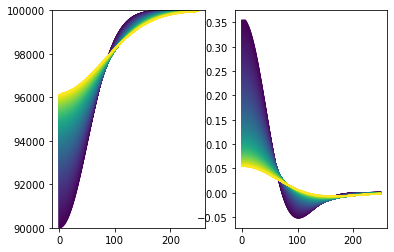

In [11]:
# full numerical solution (no fixed shape)
dt=60
a=0.5
rmax=50000
Pe=100000
Pdmax=10000
r=np.arange(0,250000,3000)
rkm=r/1000
Pd0=Pdmax*np.exp(-r**2/(2*rmax**2))
P0=Pe-Pd0
def smooth(x, N):
    return(np.convolve(x, np.ones((N,))/N)[(N-1):])

def calc_dPdt(P,r):
    dr=r[1]-r[0]
    dPdr=np.gradient(P,r)
    Vr=-a*dPdr
    dVrdr=np.gradient(Vr,r)
    dPdt=-Vr*dPdr-P*dVrdr-P*Vr/r
    dPdt[1]=dPdt[2]
    dPdt[0]=dPdt[1]
    dPdt=smooth(dPdt,1)
    return(dPdt)

# t=np.arange(0,60*60*0.1,dt)
t=range(0,60*12-1)
P=[P0]
dPdt=[]
for tt in t:
    dPdt.append(calc_dPdt(P[-1],r))
    P.append(dPdt[-1]*dt+P[-1])
Pdfn8=[Pe-PP[0] for PP in P[::1]]
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(t)+1)))    
fig,axs=plt.subplots(1,2)


# plt.plot(rkm,P)
ax=axs[0]
for PP in P:
    ax.plot(rkm,PP)
ax.set_ylim((Pe-Pdmax,Pe))

ax=axs[1]
for dPP in dPdt:
    ax.plot(rkm,dPP)
# ax.set_ylim(())

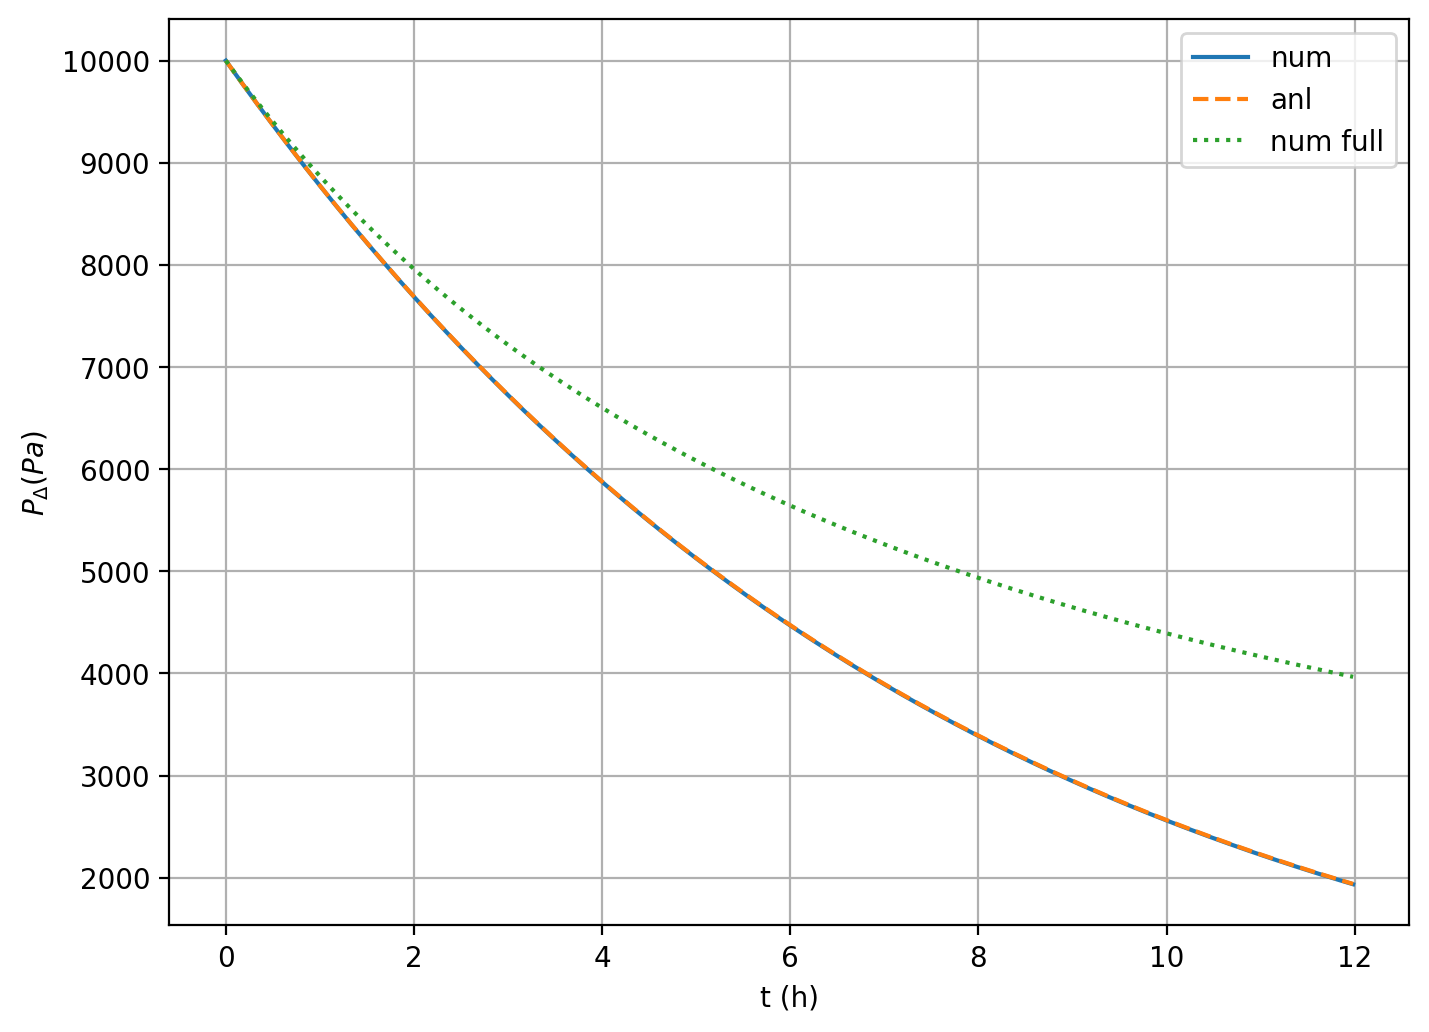

In [149]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10(np.linspace(0,1,10)))  
fig,ax=plt.subplots(1,1,dpi=200,figsize=(8,6))
ax.plot(thr,Pd)
ax.plot(thr,Pda,linestyle='--')
ax.plot(thr,Pdfn,linestyle=':')
# ax.plot(thr,Pdfn8,linestyle=':')

ax.grid(True)
ax.set_xlabel('t (h)')
ax.set_ylabel('$P_\Delta (Pa)$')
ax.legend(('num','anl','num full'));

<ipython-input-118-d22f50b25743>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc=ax.pcolormesh(rms/1000,P0s/100,th/(60*60))


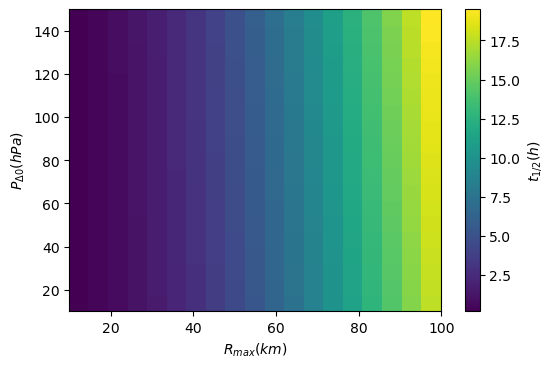

In [118]:
rms=np.linspace(10000,100000,20)
P0s=np.linspace(1000,15000,20)
rmsg,P0sg=np.meshgrid(rms,P0s)
th=((rmsg**2)/(2*a*Pe))*np.log(1+(Pe/(Pe-P0sg)))

fig,ax=plt.subplots(1,1,dpi=100)
pc=ax.pcolormesh(rms/1000,P0s/100,th/(60*60))
ax.set_ylabel('$P_{\Delta0} (hPa)$')
ax.set_xlabel('$R_{max} (km)$')
cb=plt.colorbar(pc)
cb.set_label('$t_{1/2} (h)$')